Bioinformatyka2 2025/2026, Adrian Kania, Ćwiczenia1

<h2> Napisy i wyrażenia regularne

In [1]:
seq = "ATATA"

In [2]:
seq.count("A")

3

In [3]:
seq.count("ATA")

1

In [4]:
import re

len(re.findall('(?=ATA)', seq))

2

<h3> Biblioteka re

- [abc] <-- a lub b lub c
- [A-Z] <-- od A do Z
- [^X]  <-- wszystko z wyjątkiem X
- . <-- cokolwiek
- \d <-- dowolna cyfra od 0 do 9
- \D <-- wszystko z wyjątkiem cyfr [^d]
- \s <-- spacja
- \S <-- wszystko co nie jest spacją
- \w <-- a-z, A-Z, cyfry, podkreślenie _
- \* <-- żadne lub dowolnej długości powtórzenie, np ca*t znaczy ct, cat, caat, caaat...
- \+ <-- jedno lub więcej powtórzenie, np ca+t znaczy cat, caat, caaat...
- ? <-- żadne wystąpienie lub jedno wystąpienie, np pyt?hon znaczy pyhon lub python
- {n} <-- znaczy, że coś ma nastąpić n razy
- {n,m} <-- znaczy, że coś ma nastąpić między n a m razy np ab{1,3}c znaczy  abc, abbc, abbbc
- (X|Y) <-- X lub Y
- ^x <-- znaczy, że od x ma sie zacząć wyraz
- x$ <-- znaczy, że na x ma sie kończyc wyraz

In [12]:
text = "dog deg dag dug dag dag"

t = re.findall('d[oa]g', text)    
print(t)

['dog', 'dag', 'dag', 'dag']


In [13]:
seq = "ATGCGTTGCCTTAGCATCGCTTTGATCGGAGCCTAGGCG"

t2 = re.findall('CG?T{2}', seq)
print(t2)

['CGTT', 'CTT', 'CTT']


<h4> Zadanie1: Dla sekwencji $s$ zapisz do listy wszystkie podsekwencje postaci $GXXTA$, gdzie $X$ jest dowolnym nukleotydem z wyjątkiem adeniny.

In [14]:
s = "ATGCGCGCGGCGGATCGAATAGGCTAGCTAGGCTATATGCGCTATATGCGCCGTATAGGAGTCTAGCGTATATGCGATTCGATTCGTATAGCGTAGCTCTGAGACTCTGAGAGC"

<h2> Matplotlib

In [15]:
import matplotlib.pyplot as plt  #pakiet do rysowania wykresow

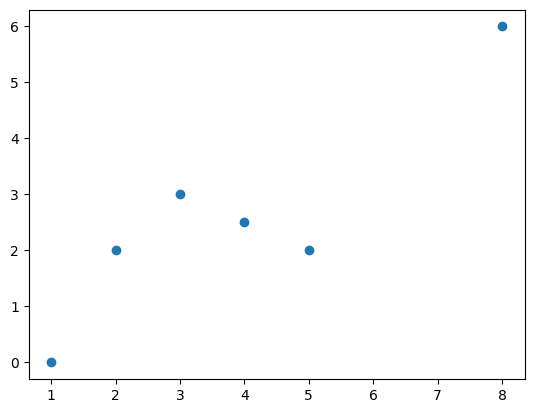

In [16]:
x = [1,2,3,4,5,8]
y = [0,2,3,2.5,2,6]

plt.scatter(x,y)
plt.show()

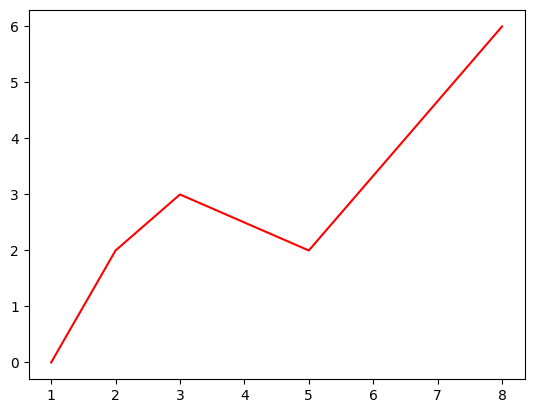

In [17]:
plt.plot(x, y, c = "red")
plt.show()

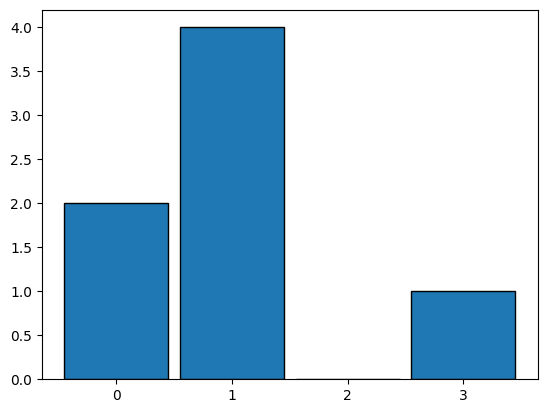

In [18]:
import matplotlib.pyplot as plt

t = [0,0,1,1,1,1,3]

plt.hist(t, bins=[-0.5, 0.5, 1.5, 2.5, 3.5], align='mid', rwidth=0.9, edgecolor='black')
plt.xticks([0, 1, 2, 3])  # ustawienie znaczników osi X
plt.show()

<h2> 1. Drugie prawo Chargaffa

Okazuje się, że dla organizmów posiadających jako materiał genetyczny dwuniciowy DNA spełnione jest następujące prawo, dla każdej z nici: częstość występowania danej sekwencji i odwrotnie do niej komplementarnej jest w przybliżeniu takie samo. W szczególnym przypadku $A \% \approx T \%$ oraz $C \% \approx G\%$. Okazuje sie, że przyczyna tego prawa może mieć naturę termodynamiczną (DNA sequence symmetries from randomness: the origin of the Chargaff’s second parity rule, Briefings in Bioinformatics, 2020).

In [20]:
f = open("ec.fasta", "r")  #pobieram genom E.coli #HG738867.1
g = f.read()
f.close()

In [21]:
g[:500]

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC\nTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAA\nTATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACC\nATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAG\nCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAA\nGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCC\nAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTG\nAAA'

In [22]:
g = g.replace('\n', '') #kasuje \n (znaki końca linii)

In [23]:
N = len(g)
print(N)

4527247


In [27]:
#Stosunki A/T i G/C

g.count("A")/g.count("T"), g.count("G")/g.count("C")

(0.9967237559950964, 1.023655446429986)

In [28]:
#tworzę liste dinukleotydow

nukleotydy = ["A","T","G","C"]
din =[]

for n in nukleotydy:
    for m in nukleotydy:
            din.append(n+m)

print(din)

['AA', 'AT', 'AG', 'AC', 'TA', 'TT', 'TG', 'TC', 'GA', 'GT', 'GG', 'GC', 'CA', 'CT', 'CG', 'CC']


In [29]:
Z = [len(re.findall('(?='+x+')', g))/(N-1) for x in din] #częstosci występowania dinukleotydow

print(Z)

[0.07295362346115056, 0.06672224129194658, 0.05160399942923358, 0.054400622365119986, 0.045640108799035885, 0.07314225911293533, 0.07087531801894574, 0.05683035558483016, 0.05838140891835787, 0.05607117439608981, 0.05969456928119214, 0.08273683382789448, 0.06870512448406824, 0.050552366714775386, 0.07471009969416285, 0.056979894620261415]


In [30]:
sum(Z)

1.0

In [31]:
czestosci = dict(zip(din,[round(x,3) for x in Z]))

print(czestosci)

{'AA': 0.073, 'AT': 0.067, 'AG': 0.052, 'AC': 0.054, 'TA': 0.046, 'TT': 0.073, 'TG': 0.071, 'TC': 0.057, 'GA': 0.058, 'GT': 0.056, 'GG': 0.06, 'GC': 0.083, 'CA': 0.069, 'CT': 0.051, 'CG': 0.075, 'CC': 0.057}


In [32]:
#definuje funkcje, ktora dla zadanej sekwencji zwraca sekwencje do niej odwrotnie komplementarną

def REV_COM_DNA(seq):
    complementary_code = {"A":"T", "T":"A", "G":"C", "C":"G"}
    rev_com_seq = ''
    for elem in seq:
        rev_com_seq = complementary_code[elem] + rev_com_seq
    return rev_com_seq

In [33]:
N_SK = [x for x in din if x != REV_COM_DNA(x)]  #wybieram tylko te dinukleotydy ktore nie są rownoczesnie odwrotną komplementarną (jak np AT)
print(N_SK)

['AA', 'AG', 'AC', 'TT', 'TG', 'TC', 'GA', 'GT', 'GG', 'CA', 'CT', 'CC']


In [34]:
unikatowe = set() 
ile = []
for x in N_SK:
    for y in N_SK:
        if x == REV_COM_DNA(y) and x not in unikatowe and y not in unikatowe:
            ile.append(czestosci[x]/czestosci[y])
            unikatowe.add(x)
            unikatowe.add(y)

In [35]:
print(unikatowe)

{'GT', 'CC', 'GG', 'CT', 'AG', 'AC', 'TT', 'GA', 'CA', 'AA', 'TC', 'TG'}


In [36]:
print(ile) #stosunki częstosci dinukleotydow i odwrotnie do nich komplementarnych

[1.0, 1.0196078431372548, 0.9642857142857143, 1.0289855072463767, 0.9827586206896551, 1.0526315789473684]


<h4> Zadanie2: Wykonaj analogiczne obliczenia dla trójek i czwórek nukleotydów (weź odpowiednio więcej miejsc po przecinku). Narysuj histogramy stosunków częstości dla obu przypadków.

**Nullomery**: Ile (teoretycznie) istnieje różnych sekwencji nukleotydowych o długości 1, 2, 3,..., 10? 
    
- Czy wszystkie z nich występują w genomie E.coli? 
- Przy jakiej długości pojawia się pierwsza rozbieżność między potencjalnie możliwymi a istniejącymi w genomie sekwencjami?

<h3> Uzupełnienie

In [38]:
import itertools
seqs = [''.join(p) for p in itertools.product(['A', 'T', 'G', 'C'], repeat=3)]
print(seqs)

['AAA', 'AAT', 'AAG', 'AAC', 'ATA', 'ATT', 'ATG', 'ATC', 'AGA', 'AGT', 'AGG', 'AGC', 'ACA', 'ACT', 'ACG', 'ACC', 'TAA', 'TAT', 'TAG', 'TAC', 'TTA', 'TTT', 'TTG', 'TTC', 'TGA', 'TGT', 'TGG', 'TGC', 'TCA', 'TCT', 'TCG', 'TCC', 'GAA', 'GAT', 'GAG', 'GAC', 'GTA', 'GTT', 'GTG', 'GTC', 'GGA', 'GGT', 'GGG', 'GGC', 'GCA', 'GCT', 'GCG', 'GCC', 'CAA', 'CAT', 'CAG', 'CAC', 'CTA', 'CTT', 'CTG', 'CTC', 'CGA', 'CGT', 'CGG', 'CGC', 'CCA', 'CCT', 'CCG', 'CCC']


<h2> 2. Nekroza i apoptoza w komórkach nerwowych

Proteazy odgrywają zasadniczą rolę w funkcjonowaniu komórek. Związane są m.in. z procesami trawienia, degradacją niepotrzebnych białek a także bezpośrednio uczestniczą w śmierci komórki.

Pewne obrażenia w mózgu prowadzą do procesów apoptozy i nekrozy obecnych tam komórek. Ważne w tym kontekście są dwie proteazy: <strong> kaspaza-3 i kalpaina-2 </strong>. Ta pierwsza aktywna jest w czasie apoptycznej śmierci komórki. Z kolei kalpaina-2 bierze udział w nekrozie (<em>Novel Bioinformatics–Based Approach for Proteomic Biomarkers Prediction of Calpain-2 & Caspase-3 Protease Fragmentation: Application to βII-Spectrin Protein, Scientific Reports (2017)</em>). 
    
Isotnie różne są miejsca cięcia, a więc i produkty trawienia tych białek.

- Kaspaza−3 rozpoznaje następujące sekwencje: $DXXD \uparrow X$, $EXXD \uparrow X$, $DXXE \uparrow X$, $EXXE \uparrow X$ przy czym miejsce cięcia zaznaczono strzałką.
- Kalpaina−2 rozpoznaje następujące sekwencje: $LX\uparrow X$,$VX \uparrow X$ i $IX \uparrow X$, przy czym miejsce cięcia zaznaczono strzałką.


<h4> Zadanie3: Ile jest wszystkich możliwych sekwencji rozpoznawanych przez kaspazę-3 a ile przez kalpainę-2? (policz kombinatorycznie)

Jednym z substratów dla kaspazy-3 i kalpainy-2 w mózgu może być βII-spektryna. Stanowi ona element 
rusztowania komórki, gdzie wraz z aktyną determinuje kształt komórki, aranżację białek transbłonowych, 
organizację organelli.

<h4> Zadanie4: Pobierz sekwencję białka <a href="https://www.ncbi.nlm.nih.gov/nuccore/m96803" target="_blank">beta-spektryny</a>.

<h4> Zadanie5: Używając programu <a href="http://www.bioinformatics.nl/cgi-bin/emboss/pepstats" target="_blank">pepstats</a> wyznacz liczbę aminokwasów wchodzących w skład beta-spektryny, wagę oraz ładunek tego białka. Podaj liczbę reszt Asp(D), Leu(L), Val(V) Ile(I). Podaj udział aminokwasów polarnych (w tym D) oraz niepolarnych (w tym V, L, I). 

<h4> Zadanie6: Wyznacz ilość potencjalnych miejsc cięcia beta-spektryny prez Kaspazę-3 oraz Kalpainę-2 

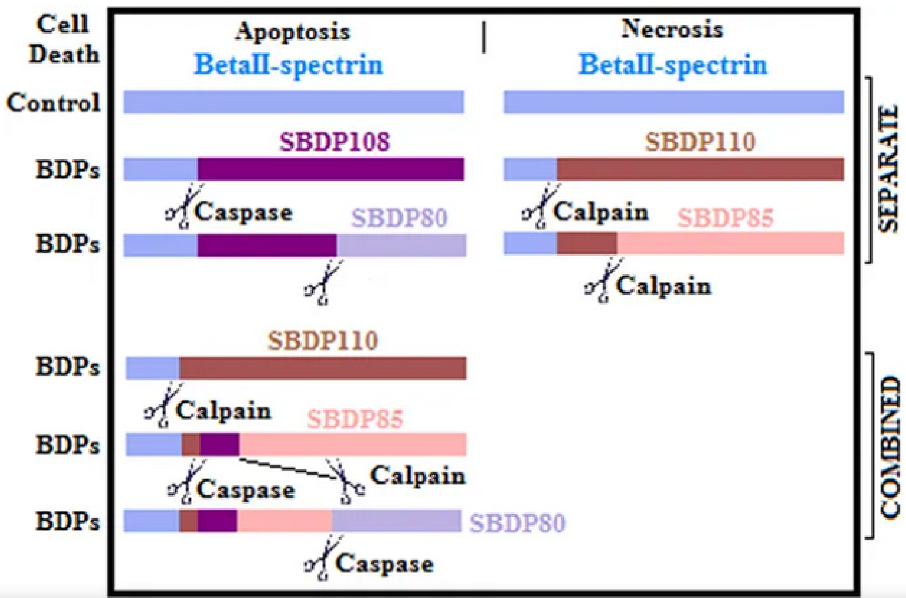

In [40]:
from IPython import display
display.Image("sp.png", width="500", height="300")

<h4> Zadanie7: Przeanalizuj potencjalne fragmenty, na jakie może zostać pocięta β-spektryna przez kaspazę-3. Zlokalizuj prawdopodobne miejsca cięcia odpowiedzialne za otrzymanie fragmentów o masach ok. 108 i 80 kDa (dopuszczalny błąd na poziomie 3.5%) - wystarczy podać po przykładzie. Można przy tym użyć  <a href="https://regex101.com/" target="_blank">regex online</a>.

<h4> Zadanie8: Wykonaj analogiczne obliczenia dla kalpainy-2 (tutaj szukamy fragmentów o masach ok. 110 kDa i 85 kDa, wystarczy po jednym).

<h3> Uzupełnienie

https://biopython.org/wiki/Download

In [41]:
from Bio.SeqUtils import molecular_weight

molecular_weight("ATVA", "protein")

360.406

In [44]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

seqs = ProteinAnalysis("ATVA")

print(seqs.molecular_weight())
print()
print(seqs.count_amino_acids()['A'])
print()
print(seqs.get_amino_acids_percent()['A'])
print()
print(seqs.isoelectric_point())
print()

360.406

2

0.5

5.57001667022705

